## DATA PROCESSING
Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, …) you have been given the following tasks:

## Question 1. 
Read in the provided ACW Data using the CSV library.

In [1]:
#import libraries
import csv
import json

In [2]:
'''open and read file using csv reader as well as the try and except rule to except possible errors. Create an empty list and 
use a for loop to append the data read to the empty list for subsequent use'''

acwuser_data = []

try:
    with open("./acw_user_data.csv", mode = 'r') as acw_file:
        csv_file = csv.reader(acw_file, delimiter = ',')
        for line in csv_file:
            acwuser_data.append(line)
except Exception as error:
    Print(f'An error with error message: {error} occured!')

## Question 2. 
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:

a. Vehicle - consists of make, model, year, and type

b. Credit Card - consists of start date, end date, number, security code, and IBAN.

c. Address - consists of the main address, city, and postcode.
For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.

In [3]:
'''Using the for loop and enumerate, I am going to inspect the headers in my data with their index by assigning a variable 
'headers' to the index 0 of my data '''
headers = acwuser_data[0]
for row_no, row in enumerate(headers):
    print ( row_no, row)

0 Address Street
1 Address City
2 Address Postcode
3 Age (Years)
4 Distance Commuted to Work (miles)
5 Employer Company
6 Credit Card Start Date
7 Credit Card Expiry Date
8 Credit Card Number
9 Credit Card CVV
10 Dependants
11 First Name
12 Bank IBAN
13 Last Name
14 Marital Status
15 Yearly Pension (GBP)
16 Retired
17 Yearly Salary (GBP)
18 Sex
19 Vehicle Make
20 Vehicle Model
21 Vehicle Year
22 Vehicle Type


In [4]:
'''I am defining a function to convert my csv file into a rich nested structure. First I create an empty list that will house
all customer data, then I create an empty dictionary for the three nested structures in the question, in addition I created an 
empty dictionary for personal data where add the First Name, Last Name, Age and Sex of the users''' 
def nest_my_data(Dataset):
    All_Customers = []
    
    '''Using for loop, enumerate and continue, I skip the header in my data, grab all details for each customer in a dictionary 
    I named 'Customer' and I append this dictionary to the 'All_Customers' list'''
    for row_no, row in enumerate (Dataset):
        if row_no == 0:
            continue
        Customer = {}
        Personal_Data = {}
        Vehicle = {}
        Credit_Card = {}
        Address = {}
        
        '''Here I pass the data in each indexed row to the applicable sub-dictionaries while assigning keys to each value.
        I also casted applicable datatypes from string to integer or float. I set the 'Retired' row to check if True 
        to convert the data type to bool.
        ''' 
        Personal_Data['First Name'] = row[11]
        Personal_Data['Last Name'] = row[13]
        Personal_Data['Age'] = int (row[3])
        Personal_Data['Sex'] = row[18]
        
        Address['Street']= row[0]
        Address['City'] = row [1]
        Address['Postcode'] = row[2]
                
        Credit_Card['Start Date'] = row[6]
        Credit_Card['Expiry Date'] = row[7]
        Credit_Card['Card Number'] = int(row[8])
        Credit_Card['CVV'] = int (row[9])
        Credit_Card['IBAN'] = row[12]
        
        Vehicle['Make'] = row[19]
        Vehicle['Model'] = row [20]
        Vehicle['Year'] = int(row[21])
        Vehicle['Type'] = row [22]
        
        '''in the lines below, i pass the sub-dictionaries above into the dictionary I opened for each customer. I also passed 
        in other independent data directly into the customer dictionary. The 'Dependants' row returned an error 
        message when trying to cast datatype to integer, as there were some blank spaces in the data. To resolve this I caught 
        the error in the 'try and except', then used if statement to replace such incidences with a unique number 2222 so this
        can be easily identified subsequently
        '''
    
        Customer['Personal Data'] = Personal_Data
        Customer['Retired'] = row[16] == 'True'
        Customer['Marital Status'] = row [14]
        
        try:
            Customer['Dependants'] = int(row [10])
        except:
            if row[10] == "" or row[10] == " ": 
                Customer["Dependants"] = 2222
                
        Customer['Salary'] = int(row[17])
        Customer['Pension'] = int(row [15])
        Customer['Company'] = row[5]
        Customer['Daily Commute'] = float(row [4])
        Customer['Vehicle'] = Vehicle
        Customer['Credit Card'] = Credit_Card
        Customer['Address'] = Address
       
        All_Customers.append(Customer)
    return All_Customers

In [5]:
'''Here I call the function I created above to convert my user data from a flat structure to a rich data structure and I 
assigned this to a variable'''
rich_data = nest_my_data(acwuser_data)
rich_data

[{'Personal Data': {'First Name': 'Kieran',
   'Last Name': 'Wilson',
   'Age': 89,
   'Sex': 'Male'},
  'Retired': True,
  'Marital Status': 'married or civil partner',
  'Dependants': 3,
  'Salary': 72838,
  'Pension': 7257,
  'Company': 'N/A',
  'Daily Commute': 0.0,
  'Vehicle': {'Make': 'Hyundai',
   'Model': 'Bonneville',
   'Year': 2009,
   'Type': 'Pickup'},
  'Credit Card': {'Start Date': '08/18',
   'Expiry Date': '11/27',
   'Card Number': 676373692463,
   'CVV': 875,
   'IBAN': 'GB62PQKB71416034141571'},
  'Address': {'Street': '70 Lydia isle',
   'City': 'Lake Conor',
   'Postcode': 'S71 7XZ'}},
 {'Personal Data': {'First Name': 'Jonathan',
   'Last Name': 'Thomas',
   'Age': 46,
   'Sex': 'Male'},
  'Retired': False,
  'Marital Status': 'married or civil partner',
  'Dependants': 1,
  'Salary': 54016,
  'Pension': 0,
  'Company': 'Begum-Williams',
  'Daily Commute': 13.72,
  'Vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': 1996, 'Type': 'Coupe'},
  'Credit Card': {'S

## Question 3.
The client informs you that they have had difficulty with errors in the dependants column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion from Task 2. These should be changed into something meaningful when encountered. Print a list where all such error corrections take place. E.g. Problematic rows for dependants: [16, 58, 80, 98]

In [6]:
'''The spaces in dependants had been replaced in the function above with my unique number 2222. 
I create an empty list to append the index of dependents with empty strings'''
Problematic_dep_rows = []

for row_no, row in enumerate (acwuser_data):
    if row_no == 0:
        continue
    if row[10] == ' ' or row[10] == '':
        Problematic_dep_rows.append (row_no)
print(f'Problematic rows for dependants: {Problematic_dep_rows}')

Problematic rows for dependants: [22, 110, 180, 206, 271, 273, 275, 359, 461, 469, 580, 637, 680, 726, 823, 866, 918, 932, 984]


## Question 4.
Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [7]:
'''JSON library has been imported earlier.
Here I write two functions to open files and write or read them as json files where my_file is the Json file name, mode is read 
('r') or write ('w') mode and source is the dataset it is reading from. I added indent = 2 to the write mode to make the json 
file pretty
'''
def json_save(my_file, source):
    with open (my_file, mode = 'w') as data:
        json.dump(source, data, indent = 1)

def json_read(my_file):
    with open (my_file,mode = 'r') as data:
        data_read = json.load(data)
    return data_read

In [8]:
'''using the function above, I assign my dataset to a variable and write the records in it to a json file called processed.json
I also put this in a try and except block to catch error if any.
'''
try:
    json_save("processed.json", rich_data)
except Exception as error:
    print (f'Oops! You did that wrong!  {error} Try again!')
    
data_read = json_read("processed.json")     

## Question 5.
You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

In [9]:
'''I retrieved data of retired employeees and created a function to get the status of each employee, then I append these to the 
appropriate list. Thereafter I called my json save function to output both files in JSON data format.
'''
def get_employee_status(Dataset):
    retired = []
    not_retired = []

    for row in Dataset:
        if row["Retired"] == True:
            retired.append (row)
        else:
            not_retired.append (row)
    return retired, not_retired


In [10]:
retired, not_retired = get_employee_status(data_read)

In [11]:
json_save("retired.json", retired)

In [12]:
json_save("employed.json", not_retired)

## Question 6
The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [13]:
'''I created a function below to flag customers whose credit cards have more than 10 years between the start date and the
end date. To do this, I set flag to True then I assigned variables to the start date and end date rows. Then I use the split 
method to get the year and month which I convert to integer to be able to calculate the difference. 
I used the if statement to reduce the difference in year by one if the difference in month is less than zero. 
I also used the if statement to set the flag for difference less than 10 years to false.
'''
def give_flag(row):
    flag = True
    
    start_date = row['Credit Card']['Start Date']
    expiry_date = row['Credit Card']['Expiry Date']
    
    split_startdate = start_date.split('/')
    split_expdate = expiry_date.split('/')
    
    start_yy = int(split_startdate[1])
    start_mm = int(split_startdate[0])
    
    expiry_yy = int(split_expdate[1])
    expiry_mm = int(split_expdate[0])
    
    diff_yy = expiry_yy - start_yy
    diff_mm = expiry_mm - start_mm
    if diff_mm < 0:
        diff_yy = diff_yy - 1
        
    if diff_yy < 10:
        flag = False       
    return flag
    


In [14]:
'''Here i create an empty list and used the for loop to read through my data and called on the function to flag the applicable 
cards and append them to the remove card list'''
remove_card = []

for row in data_read:
    flag = give_flag(row)
    if flag == True:
        remove_card.append(row)

In [15]:
#Here i call on my json save function to write the list to a Json file called remove_ccard.json

json_save("remove_ccard.json", remove_card)

## Question 7.
You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:

a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.
i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.

b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.

In [16]:
'''I created a function i called daily commute and empty list for the data set. Using a for loop and if statement, I assigned
Salary to the new Salary_commute attribute where commute was 1 or less while salary per mile was calculated for others and 
appended to the list. The data was then sorted by Salary-Commute, using the lambda function.
'''
def daily_commute(Dataset):
    daily_commute = []
    
    for row in Dataset:
        Commute = row["Daily Commute"] 
        Salary = row["Salary"] 
        
        if Commute <= 1:
            row['Salary-Commute'] = round(Salary,2) 
        else:
            row['Salary-Commute'] = round((Salary / Commute),2)
            
        daily_commute.append (row)
    daily_commute.sort(key = lambda c : c ['Salary-Commute'])
    return daily_commute


In [17]:
Salary_commute = daily_commute(data_read)

In [18]:
#output the file to json using the json_save function
json_save("commute.json", Salary_commute)

## DATA VISUALISATION
Using Pandas and Seaborn

Your client wishes to understand the data they have on their customers a bit more by use of visualisations. With use of Pandas and Seaborn read in the original CSV file provided with the assignment.

## Question 1.
Obtain the Data Series for Salary, and Age, and calculate the following:
    
a. Mean Salary

b. Median Age

In [19]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#loading the dataset into pandas
customer_df = pd.read_csv('./acw_user_data.csv')

In [21]:
'''Obtain the data series for Salary and age and assign the applicable columns to a variable and use the mean and median 
methods to calculate.'''

Salary = customer_df ['Yearly Salary (GBP)']
Customer_Age = customer_df['Age (Years)']

print( f"Mean of Customers' Salary is {Salary.mean():.2f}\n" )
print( f"Median of Customers' Age in Years is {Customer_Age.median():.2f}" )

Mean of Customers' Salary is 57814.08

Median of Customers' Age in Years is 54.00


## Question 2. 
Perform univariate plots of the following data attributes:

a. Age, calculating how many bins would be required for a bin_width of 5.


Text(0.5, 1.0, 'Distribution of Age(Years)')

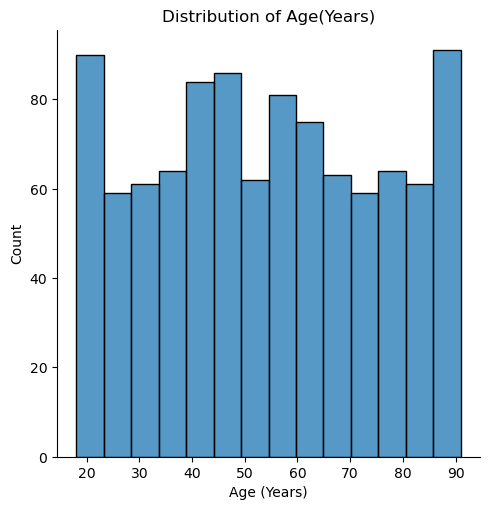

In [22]:
#use the range of minimum and maximum by the bin width to calculate how many bins are required for the plot

AgeMinMax = int(customer_df['Age (Years)'].max()) - int(customer_df['Age (Years)'].min())
calculated_bin_value = int(AgeMinMax/5)
Age_plot = sbn.displot(customer_df, x = 'Age (Years)', bins = calculated_bin_value)
plt.title('Distribution of Age(Years)')

b. Dependents, fixing data errors with seaborn itself.


Text(0.5, 1.0, 'Distribution of Dependants')

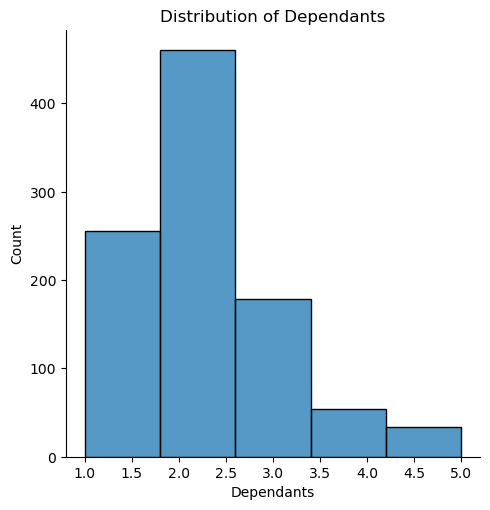

In [23]:
#unvariate plot of dependants after filling dependants with missing data with the mode 
Dep_df = customer_df['Dependants']
filler = Dep_df.fillna(Dep_df.mode())
Dep_plot = sbn.displot(customer_df,x = filler, bins=5)
plt.title('Distribution of Dependants')

c. Age (of default bins), conditioned on Marital Status

Text(0.5, 1.0, 'Distribution of Age conditioned on Marital Status')

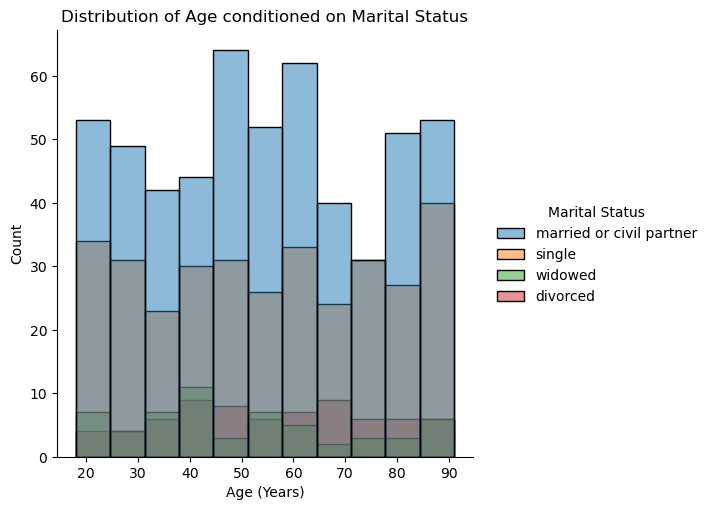

In [24]:
#plotting the Age (of default bins), conditioned on Marital Status

AgeMS_plot = sbn.displot(data = customer_df, x = 'Age (Years)', hue='Marital Status')
plt.title('Distribution of Age conditioned on Marital Status')

## Question 3.
Perform multivariate plots with the following data attributes:

a. Commuted distance against salary.


Text(0.5, 1.0, 'Yearly Salary vs Work Commute')

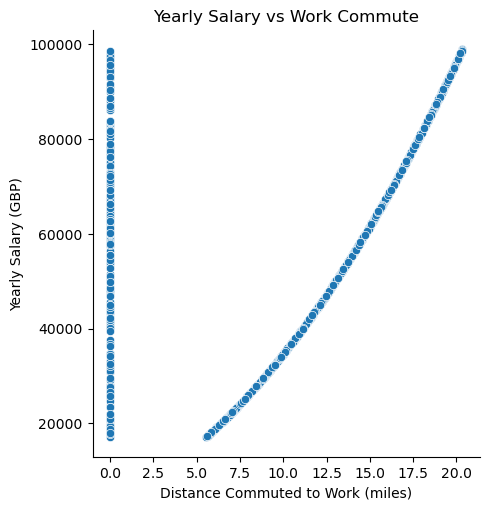

In [25]:
#here I am plotting the distance commuted to work (x-axis) against the salry in GBP (y-axis)
dis_sal = sbn.relplot(data=customer_df, x='Distance Commuted to Work (miles)', y='Yearly Salary (GBP)')
plt.title('Yearly Salary vs Work Commute')


b. Age against Salary


Text(0.5, 1.0, 'Yearly Salary vs Age')

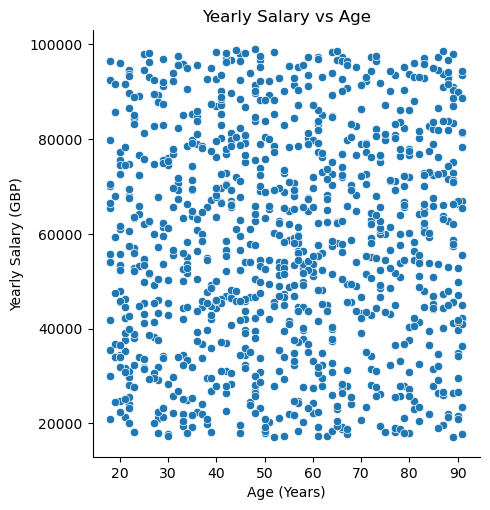

In [26]:
#Now I am plotting the Age in years (x-axis) against the salary in GBP (y-axis)
age_sal = sbn.relplot(data=customer_df, x='Age (Years)', y='Yearly Salary (GBP)')
plt.title('Yearly Salary vs Age')

c. Age against Salary conditioned by Dependants

Text(0.5, 1.0, 'Yearly Salary vs Age conditioned on Dependants')

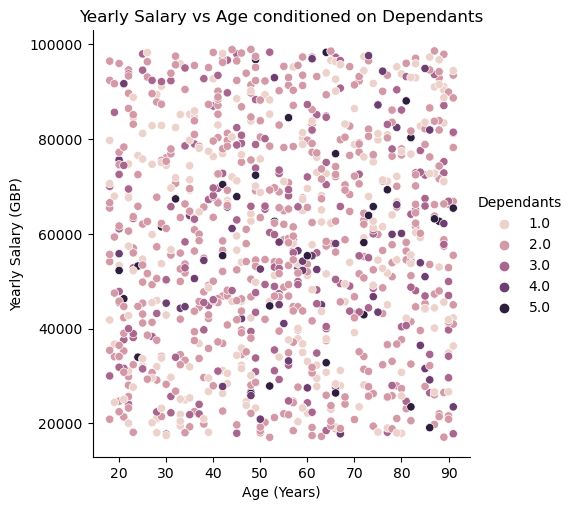

In [27]:
#Here I will condition the figure above by Dependants
age_salhue = sbn.relplot(data=customer_df, x='Age (Years)', y='Yearly Salary (GBP)', hue = 'Dependants')
plt.title('Yearly Salary vs Age conditioned on Dependants')

## Question 4.
Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

In [28]:
#create an empty dictionary
# add the plots to the save dict using the handle of each figure as the key and file name as value

plots_to_save = {}
plots_to_save["./uni_age.png"] = Age_plot
plots_to_save["./uni_dependants.png"] = Dep_plot
plots_to_save["./uni_ageMShue.png"] = AgeMS_plot
plots_to_save["./GBP_miles.png"] = dis_sal
plots_to_save["./GBP_Age.png"] = age_sal
plots_to_save["./GBP_Agehue.png"] = age_salhue

#iterate through each item to the dictionary to save all files using the save fig function
for file_name,plot_handle in plots_to_save.items():
    plot_handle.savefig(file_name)